# 線性判別分析(Linear Discriminant Analysis)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random
from matplotlib.patches import Ellipse
import math

# Training Data

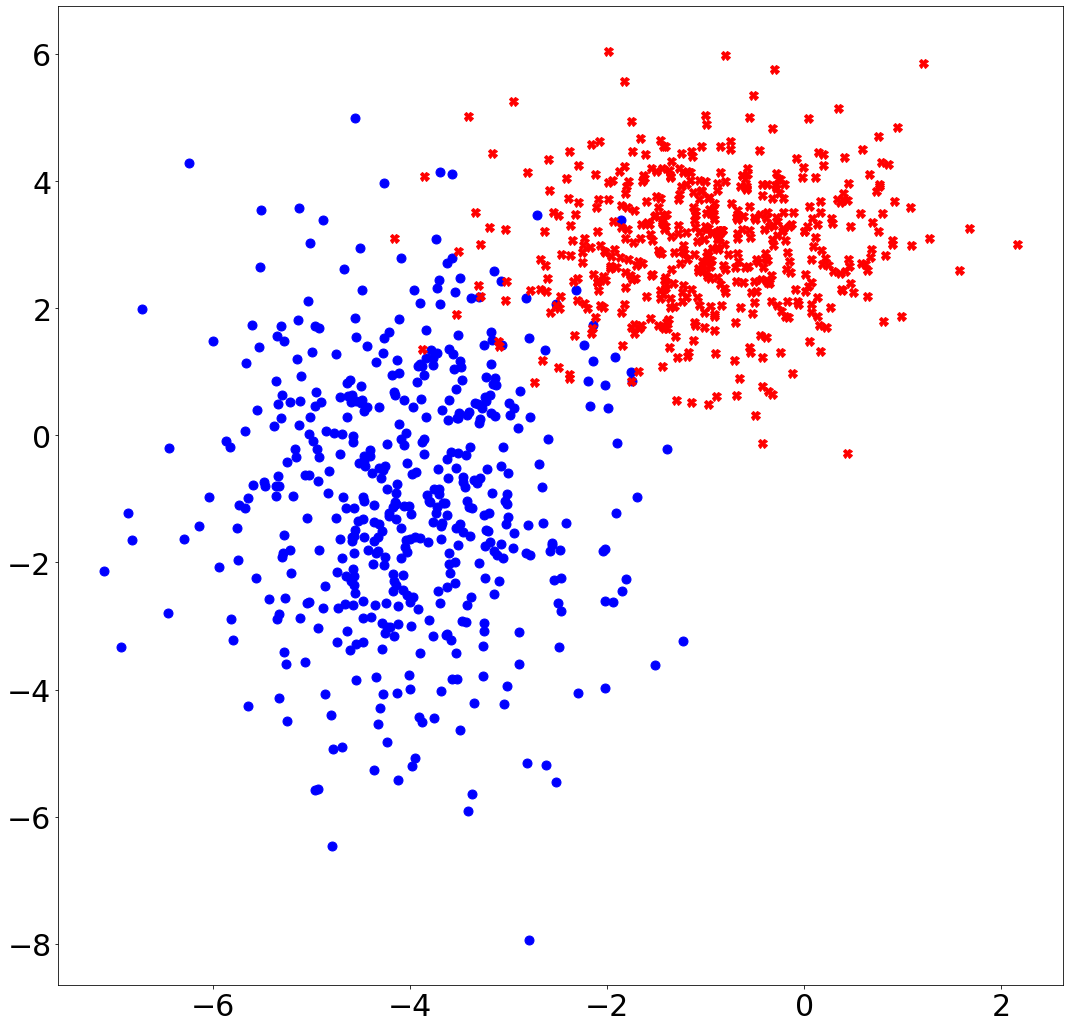

In [2]:
N=1000
CLASS=2
x=np.zeros((N,2))
y=random.randint(0,CLASS,N)
x_loc=[-4,-1]
x_scale=[1,1]
y_loc=[-1,3]
y_scale=[2,1]
color=["bo","rX"]
plt.rcParams["figure.figsize"] = (18,18)
for i in range(0,CLASS):
    BOOL=(y==i)
    x[BOOL,0]=random.normal(loc=x_loc[i], scale=x_scale[i], size=(sum(BOOL)))
    x[BOOL,1]=random.normal(loc=y_loc[i], scale=y_scale[i], size=(sum(BOOL)))
    plt.plot(x[BOOL,0],x[BOOL,1],color[i],markersize=9)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Parameter Setting

In [3]:
pi_1=sum(y==0)/N
pi_2=sum(y==1)/N
mu_1=np.sum(x[y==0],axis=0)/sum(y==0)
mu_2=np.sum(x[y==1],axis=0)/sum(y==1)
sigma=(np.dot((x[y==0]-mu_1).T,(x[y==0]-mu_1))+np.dot((x[y==1]-mu_2).T,(x[y==1]-mu_2)))/(N-2)
S_B=np.outer((mu_1-mu_2),(mu_1-mu_2))
S_D=sigma
eigenvalue,eigenvector=np.linalg.eig(np.dot(np.linalg.inv(S_D),S_B))
# the eigenvalue in 0 or 1 
w=eigenvector[:,0]

# Project to 1D guess w=[1,0]

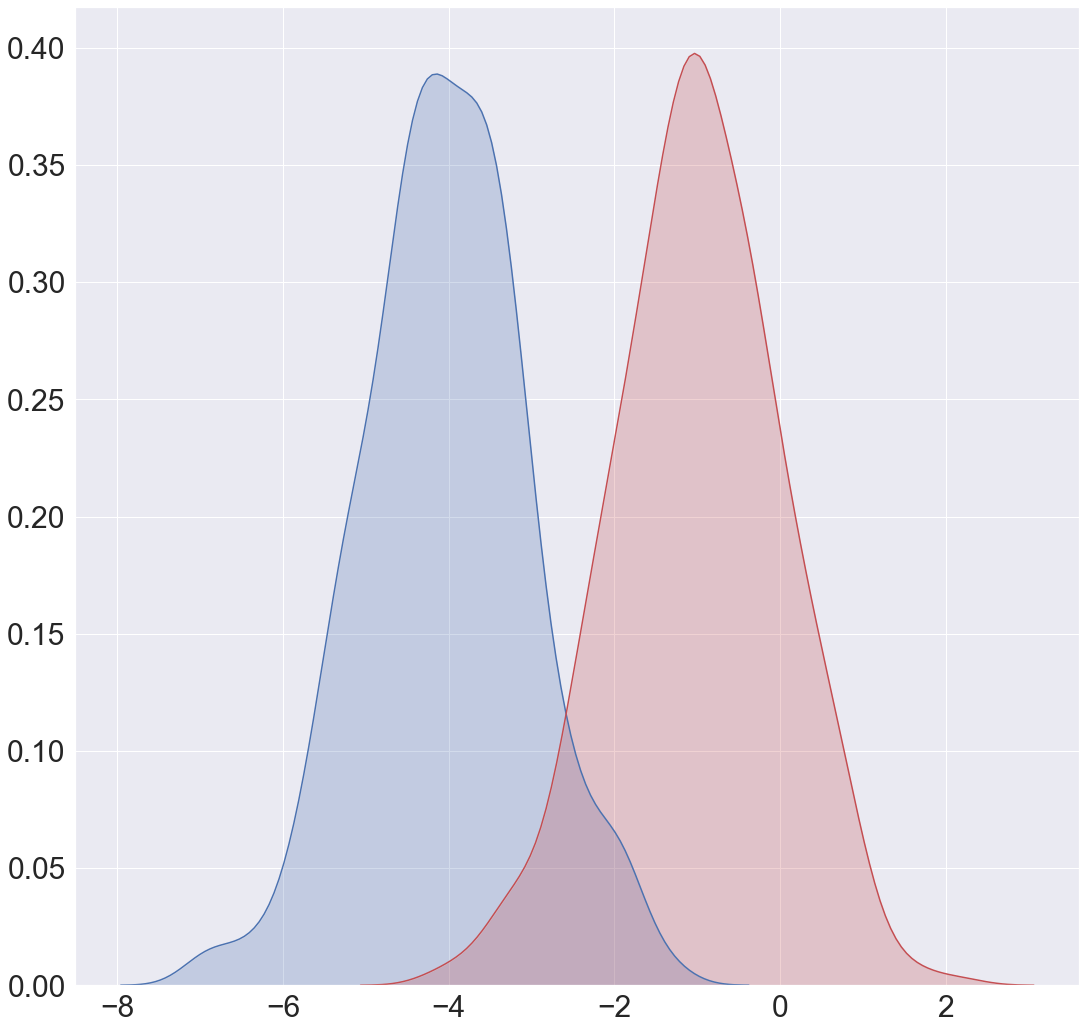

In [4]:
trans_none=np.dot(x,[1,0])
plt.rcParams["figure.figsize"] = (18,18)
sns.set(style="darkgrid")
cc=["b","r"]
for i in range(0,2):
    BOOL=(y==i)
    fig = sns.kdeplot(trans_none[BOOL], shade=True, color=cc[i])
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Project to 1D with training w

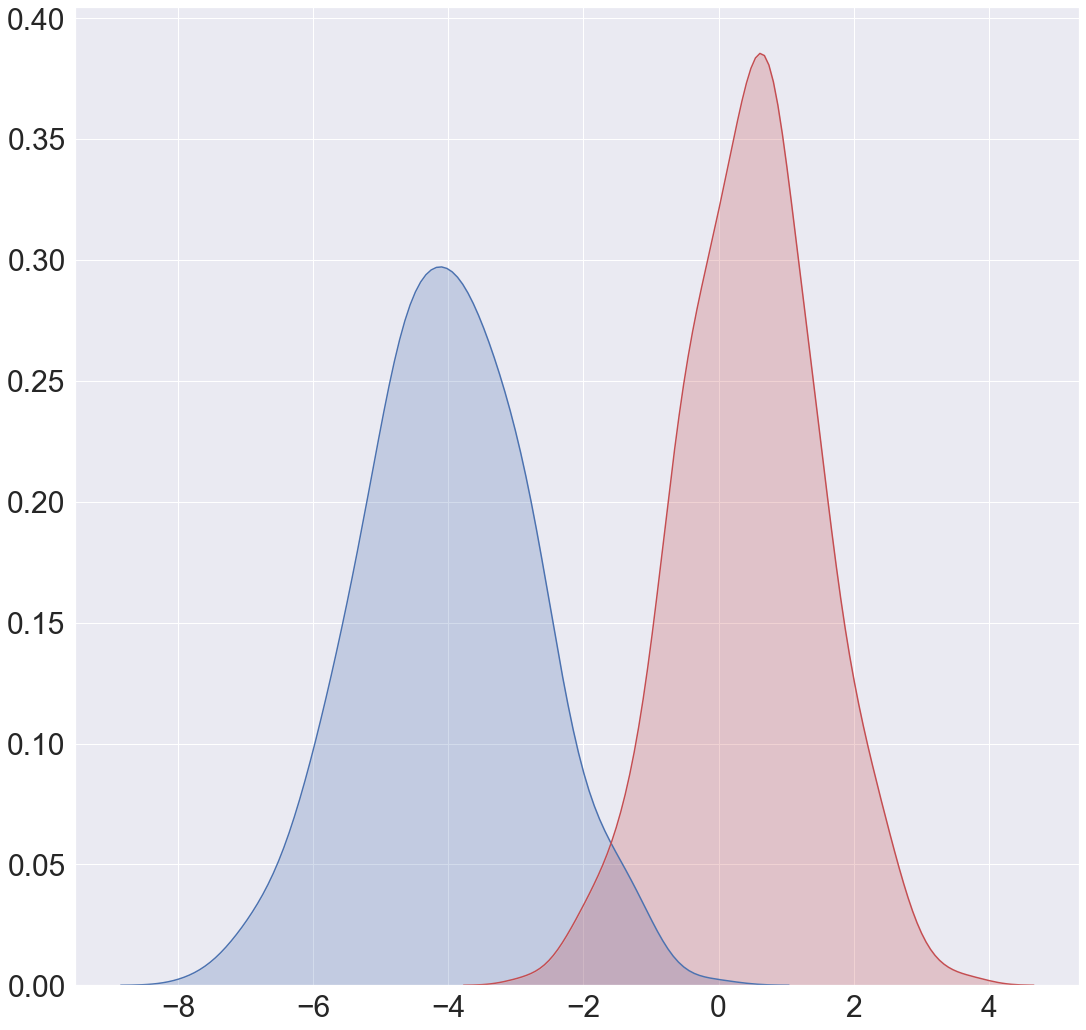

In [5]:
trans=np.dot(x,w)
plt.rcParams["figure.figsize"] = (18,18)
sns.set(style="darkgrid")
cc=["b","r"]
for i in range(0,2):
    BOOL=(y==i)
    fig = sns.kdeplot(trans[BOOL], shade=True, color=cc[i])
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Classification Line

In [6]:
a=2*np.dot(np.linalg.inv(sigma),mu_2-mu_1)
b=np.dot(np.dot((mu_1)[None,:],np.linalg.inv(sigma)),mu_1)-np.dot(np.dot((mu_2)[None,:],np.linalg.inv(sigma)),mu_2)+2*np.log(pi_2/pi_1)
m=-a[0]/a[1]
p=-b/a[1]
plot_x=np.linspace(min(x[:,0]),max(x[:,0]),10)
plot_y=m*plot_x+p

# Plot Distribution

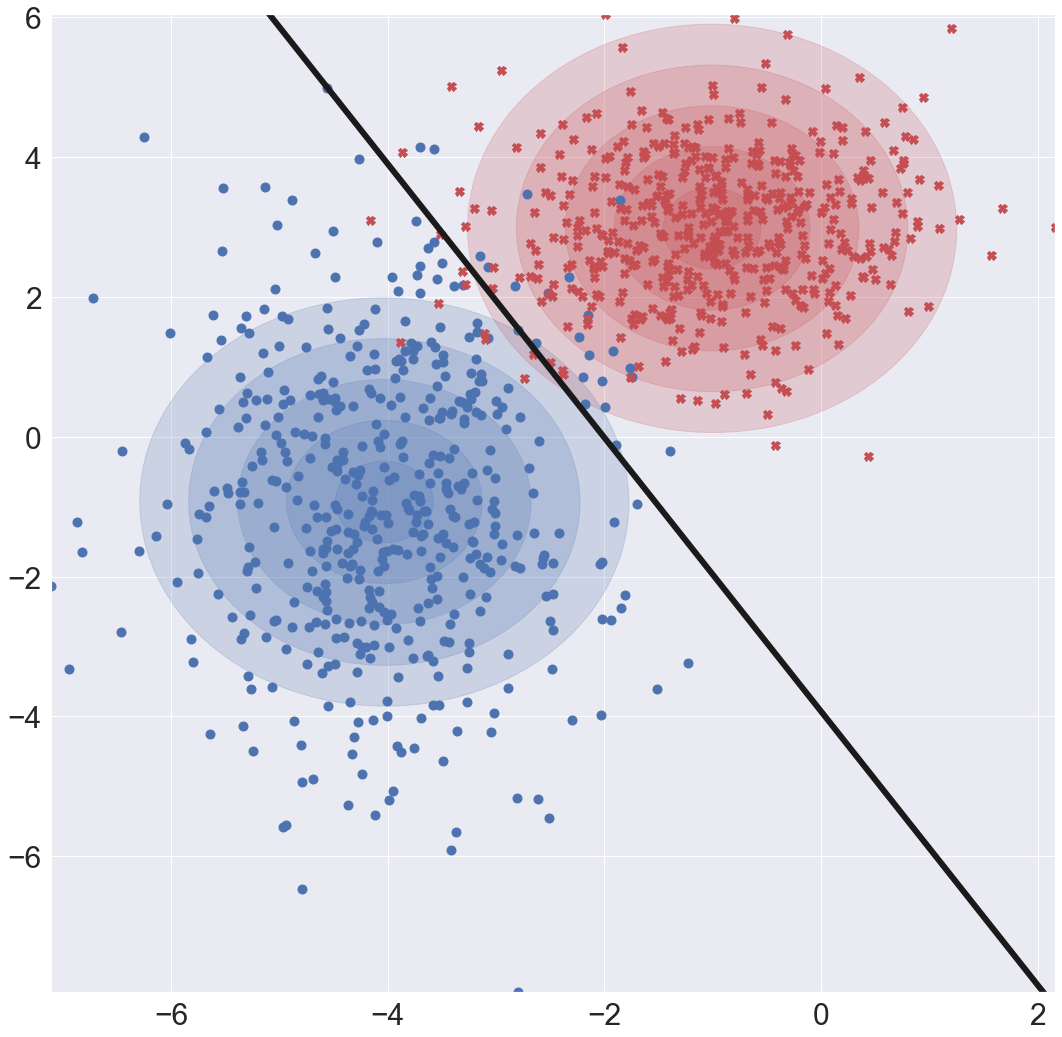

In [7]:
plt.rcParams["figure.figsize"] = (18,18)
fig = plt.figure()
ax = fig.add_subplot(111, xlim=(min(x[:,0]),max(x[:,0])), ylim=(min(x[:,1]),max(x[:,1])))
for i in range(0,CLASS):
    BOOL=(y==i)
    plt.plot(x[BOOL,0],x[BOOL,1],color[i],markersize=9)
    for j in range(1,6):
        ellipse = Ellipse((np.mean(x[BOOL,0]),np.mean(x[BOOL,1])),
                          j*np.dot(S_D,w)[0],j*np.dot(S_D,w)[1],angle=math.atan(w[1]/w[0]),
                          color=cc[i],alpha=0.2)
        ax.add_artist(ellipse)
plt.plot(plot_x,plot_y,"k-",linewidth=6)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()